# Text2Cypher Graph Agent Demo

In [1]:
import sys
sys.path.append("../")

from dotenv import load_dotenv

load_dotenv()

from src.ps_genai_agents.agents.graph.text2cypher import create_text2cypher_graph_agent

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The procedure has a deprecated field. ('config' used by 'apoc.meta.graphSample' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: "CALL apoc.meta.graphSample() YIELD nodes, relationships RETURN nodes, [rel in relationships | {name:apoc.any.property(rel, 'type'), count: apoc.any.property(rel, 'count')}] AS relationships"


In [2]:
agent = create_text2cypher_graph_agent()

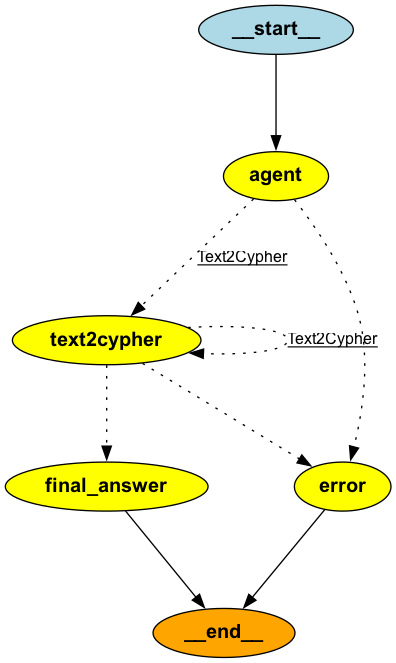

In [3]:
from IPython.display import Image

Image(agent.get_graph().draw_png())

In [4]:
res = agent.invoke(
    {
        "input": "What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?",
        "chat_history": [],
    }
)

> run_agent
initial data:  {'input': 'What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'What are the total responses under seat23 for Honda Civic?'} log="\nInvoking: `Text2Cypher` with `{'query': 'What are the total responses under seat23 for Honda Civic?'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_FCbUUCsARZmGNS0ieZ21T9gB', 'function': {'arguments': '{"query": "What are the total responses under seat23 for Honda Civic?"}', 'name': 'Text2Cypher'}, 'type': 'function'}, {'id': 'call_k7aZJs6nq5jYctuTs7JwqkVc', 'function': {'arguments': '{"query": "What is the male to female proportion for responses under seat23 for Honda Civic?"}', 'name': 'Text2Cypher'}, 'type': 'funct

In [5]:
res["agent_outcome"].display()


Question:
What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?

Sub Questions:
What are the total responses under seat23 for Honda Civic?
What is the male to female proportion for responses under seat23 for Honda Civic?
What is the problem for seat23?

            
Cypher:
cypher
MATCH (p:Problem {id: "SEAT23"})<-[:HAS_PROBLEM]-(v:Verbatim {make: "Honda", model: "Civic"})
WITH p.problem AS problem, COUNT(v) AS totalResponses
RETURN totalResponses, problem


cypher
MATCH (p:Problem {id: "SEAT23"})<-[:HAS_PROBLEM]-(v:Verbatim {make: "Honda", model: "Civic"})
WITH p.problem AS problem, COUNT(v) AS totalResponses, 
SUM(CASE WHEN v.gender = "Male" THEN 1 ELSE 0 END) AS males,
SUM(CASE WHEN v.gender = "Female" THEN 1 ELSE 0 END) AS females
RETURN totalResponses, males, females, toFloat(males) /  (CASE WHEN females = 0 THEN 1 ELSE females END) AS maleToFemaleRatio, problem



MATCH (p:Problem 

In [6]:
res = agent.invoke({"input": "What are the top 5 problems about seats for each age buckets for men over the age of 53?", "chat_history": list()})

> run_agent
initial data:  {'input': 'What are the top 5 problems about seats for each age buckets for men over the age of 53?', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'What are the top 5 problems about seats for each age buckets for men over the age of 53?'} log="\nInvoking: `Text2Cypher` with `{'query': 'What are the top 5 problems about seats for each age buckets for men over the age of 53?'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_m0nqHlpmbz75CIiZ7WOTdjpx', 'function': {'arguments': '{"query":"What are the top 5 problems about seats for each age buckets for men over the age of 53?"}', 'name': 'Text2Cypher'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 217, 'total_tokens': 254, 'completion_tokens_details': {'reasoning_tokens': 0}}, 

In [7]:
res.get("agent_outcome").display()


Question:
What are the top 5 problems about seats for each age buckets for men over the age of 53?

Sub Questions:
What are the top 5 problems about seats for each age buckets for men over the age of 53?

            
Cypher:

MATCH (v:Verbatim)-[:HAS_PROBLEM]->(p:Problem)
WHERE toLower(p.problem) CONTAINS 'seat' AND v.gender = "Male" AND v.minAge > 53 AND v.ageBucket IS NOT NULL
WITH v.ageBucket AS ageBucket, p.problem AS problem, COLLECT(v.verbatim) AS responses
WITH ageBucket, problem, SIZE(responses) AS total, responses
WITH *
ORDER BY ageBucket, total DESC
WITH ageBucket, COLLECT(problem) AS problems, COLLECT(total) AS totals, COLLECT(responses) AS responsesList
RETURN ageBucket, problems[..5] AS problem, totals[..5] AS total, responsesList[..5] AS responses
LIMIT 5




Cypher Result:
[{'ageBucket': '55-59', 'problem': ['SEAT04: Seats have insufficient range of adjustment', 'SEAT17: Seat - Squeaks/rattles/loose/abnormal noises', 'SEAT18: Seat - Excessively uncomfortable', 'SEAT97

In [15]:
res = agent.invoke({"input": "Please summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create categories for the problems. As an output, I want the summary, corresponding categories and their verbatims", "chat_history": list()})

> run_agent
initial data:  {'input': 'Please summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create categories for the problems. As an output, I want the summary, corresponding categories and their verbatims', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create categories for the problems. Provide the summary, corresponding categories, and their verbatims.'} log="\nInvoking: `Text2Cypher` with `{'query': 'summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create categories for the problems. Provide the summary, corresponding categories, and their verbatims.'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Oyc5hges6LhFFHYPXtuMdLKk', 'function': {'argument

In [16]:
res.get("agent_outcome").display()


Question:
Please summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create categories for the problems. As an output, I want the summary, corresponding categories and their verbatims

Sub Questions:
summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create categories for the problems. Provide the summary, corresponding categories, and their verbatims.

            
Cypher: 
MATCH (q:Question{id: 10})<-[:HAS_QUESTION]-(v:Verbatim)
  WHERE v.model='RDX'
WITH v.verbatim AS verbatim, v
MATCH (v)-[:HAS_PROBLEM]->(p:Problem)-[:HAS_CATEGORY]->(c:Category)
RETURN c.id AS category, p.problem AS problem, COLLECT(verbatim) AS verbatims
ORDER BY category



Cypher Result:
[{'category': 'Exterior', 'problem': "EXT10: Trunk/hatch/tailgate - Touch-free sensor doesn't work consistently/DTU", 'verbatims': ['when I move my foot under sensor sometimes the tailgate opens and sometimes it does not. It seems to be hit or miss.', 'f

In [17]:
res = agent.invoke({"input": "What are the top 5 problems about seats for each age buckets for men over the age of 53?", "chat_history": []})

> run_agent
initial data:  {'input': 'What are the top 5 problems about seats for each age buckets for men over the age of 53?', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'What are the top 5 problems about seats for each age bucket for men over the age of 53?'} log="\nInvoking: `Text2Cypher` with `{'query': 'What are the top 5 problems about seats for each age bucket for men over the age of 53?'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_RkczxCKLKFESlWthnKEtAF2T', 'function': {'arguments': '{"query":"What are the top 5 problems about seats for each age bucket for men over the age of 53?"}', 'name': 'Text2Cypher'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 212, 'total_tokens': 249, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'mo

Failed to write data to connection ResolvedIPv4Address(('52.44.11.98', 7687)) (ResolvedIPv4Address(('52.44.11.98', 7687)))
Failed to write data to connection IPv4Address(('p-6adb3c47-537b-0020.production-orch-0032.neo4j.io', 7687)) (ResolvedIPv4Address(('44.199.31.19', 7687)))
Failed to write data to connection ResolvedIPv4Address(('50.16.105.214', 7687)) (ResolvedIPv4Address(('50.16.105.214', 7687)))


Cypher attempt: 1
{'intermediate_steps': [{'Text2Cypher', '{\'result\': [{\'ageBucket\': \'55-59\', \'problem\': [\'SEAT04: Seats have insufficient range of adjustment\', \'INFO20: Not enough power plugs/USB ports\', \'SEAT18: Seat - Excessively uncomfortable\', \'SEAT17: Seat - Squeaks/rattles/loose/abnormal noises\', \'SEAT97: Other Seat Problem(s)\'], \'total\': [4, 4, 4, 4, 3], \'responses\': [[\'Bottom seat cushion is on the short side. The end/length of the seat only reaches about 2inches shy of my knee making it uncomfortable on longer drives\', \'I am 6 feet tall.. Not a good fit with longer legs\', \'I’m 6’3”. A couple more inches of leg room would be nice.\', \'Should have more front tilt range for me\'], [\'Come on guys?! In todays family-EVERYONE HAS A DEVICE THAT NEEDS CHARGING!!! There should be more conveniently place usb ports for every seat.\', \'Could do with usb charging port for the back seats\', \'Could use some in back seat.\', \'It would be very helpful if the RT

In [20]:
res.get("agent_outcome").display()


Question:
What are the top 5 problems about seats for each age buckets for men over the age of 53?

Sub Questions:
What are the top 5 problems about seats for each age bucket for men over the age of 53?

            
Cypher: 
MATCH (v:Verbatim)-[:HAS_PROBLEM]->(p:Problem)
WHERE toLower(v.verbatimText) CONTAINS 'seat' AND v.gender = 'Male' AND v.minAge > 53 AND v.ageBucket IS NOT NULL
WITH v.ageBucket AS ageBucket, p.problem AS problem, COLLECT(v.verbatim) AS responses
WITH ageBucket, problem, SIZE(responses) AS total, responses
WITH * ORDER BY ageBucket, total DESC
WITH ageBucket, COLLECT(problem) AS problems, COLLECT(total) AS totals, COLLECT(responses) AS responsesList
RETURN ageBucket, problems[..5] AS problem, totals[..5] AS total, responsesList[..5] AS responses
LIMIT 5



Cypher Result:
[{'ageBucket': '55-59', 'problem': ['SEAT04: Seats have insufficient range of adjustment', 'INFO20: Not enough power plugs/USB ports', 'SEAT18: Seat - Excessively uncomfortable', 'SEAT17: Seat - 